In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("16-diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [8]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# most probably there can be 0 in pregnancy hormones but others do not make sense. let's check them automatically.
# you can use generative ai at this point to ask for guidance if you are not sure and if you don't have a domain expert at hand

columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [11]:
# we can drop insulin and fill out the others with median or just do the same thing with insulin
# insulin can be an important factor, so i won't drop it unless i can get a confirmation from a domain expert
# i will fill this out after i check the correlation and do test-train split to avoid data leakage

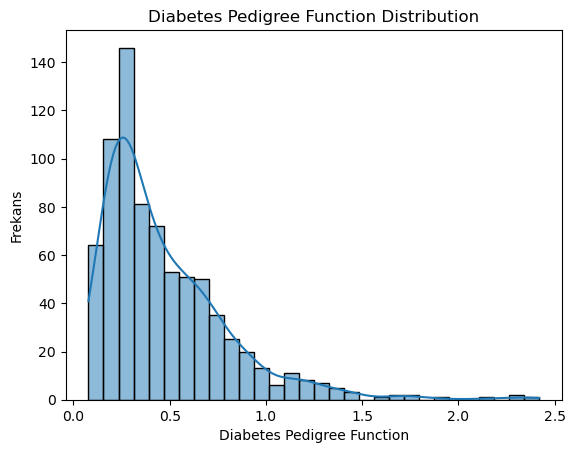

In [12]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

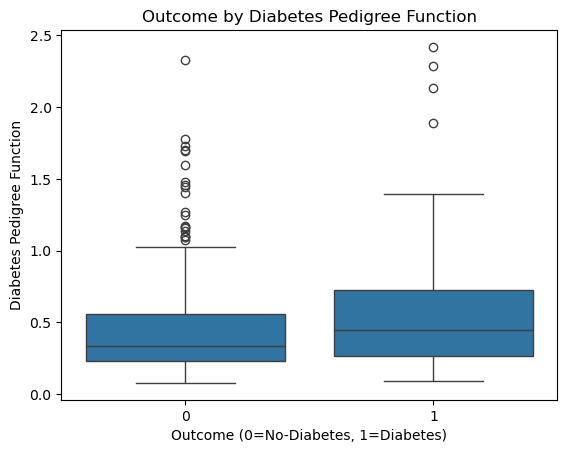

In [13]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

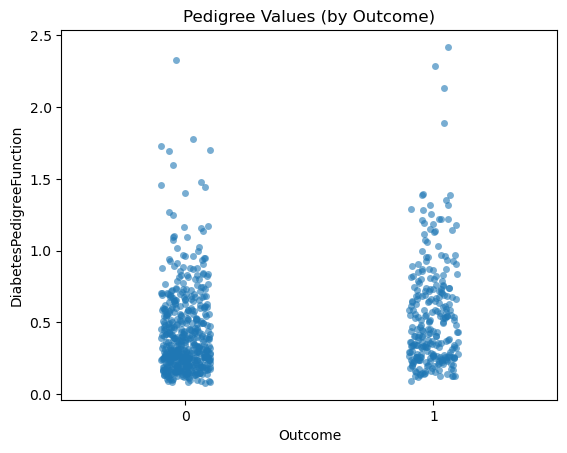

In [14]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [15]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [17]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [18]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [19]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [20]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [21]:
# scaler is not important in tree algorithms but they are important in regression, logistic regression etc.
# where we measure distance and use gradient descent. we do not need to do standardscaler but if you want you can
# use it anyway. if you comment this out you will see you will get the same result. if you will use alternative
# algorithms with adaboost, maybe it makes sense to use standardscaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

0.7532467532467533
[[87 21]
 [17 29]]


In [26]:
#hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [29]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [30]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [31]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [32]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [33]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [35]:
def calculate_model_metrics(true, predicted):
    cl_rep = classification_report(true, predicted)
    ac_sc = accuracy_score(true, predicted)
    con_mat = confusion_matrix(true, predicted)
    return cl_rep, ac_sc, con_mat

In [36]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes" : GaussianNB(),
    "K-Neighbors Classifier"  : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

In [37]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_clrep, model_train_acsc, model_train_conmat = calculate_model_metrics(y_train, y_train_pred)
    model_test_clrep, model_test_acsc, model_test_conmat = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("classification_report :", model_train_clrep)
    print("accuracy_score :", model_train_acsc)
    print("confusion_matrix :", model_train_conmat)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("classification_report :", model_test_clrep)
    print("accuracy_score :", model_test_acsc)
    print("confusion_matrix :", model_test_conmat)

    print("-----------------------------")
    print("\n")

LogisticRegression()
Evaluation for Training Set
classification_report :               precision    recall  f1-score   support

           0       0.80      0.89      0.84       392
           1       0.75      0.60      0.67       222

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

accuracy_score : 0.7833876221498371
confusion_matrix : [[347  45]
 [ 88 134]]
-----------------------------
Evaluation for Test Set
classification_report :               precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

accuracy_score : 0.7532467532467533
confusion_matrix : [[89 19]
 [19 27]]
-----------------------------


SVC()
Evalu

================ BAŞLATILIYOR: Logistic Regression ================

✅ Logistic Regression - Optimizasyon/Eğitim Tamamlandı!
  En İyi Parametreler: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
  En İyi Çapraz Doğrulama Skoru (CV): 0.7719712115153938

--- Eğitim Seti Değerlendirmesi ---
Doğruluk (Accuracy): 0.7834

--- Test Seti Değerlendirmesi ---
Doğruluk (Accuracy): 0.7468
Karışıklık Matrisi:
 [[88 20]
 [19 27]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       108
           1       0.57      0.59      0.58        46

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154

----------------------------------------------------------------

================ BAŞLATILIYOR: Support Vector Machine ================

✅ Support Vector Machine - Optimizasyon/Eğitim Tamamlandı!
  En İyi Parametreler: {'C': 

C:\Users\Bilal\AppData\Local\Temp\ipykernel_2144\1914452957.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=results_df_sorted, palette='viridis')


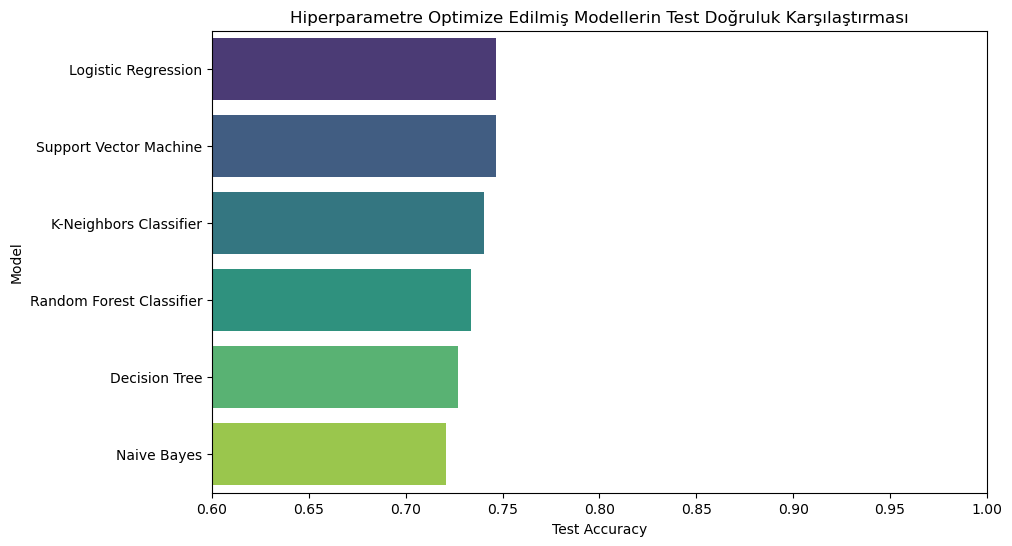

In [39]:
# ==============================================================================
# 1. Modelleri ve Parametre Aralıklarını Tanımlama
# ==============================================================================

# Modeller Sözlüğü
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

# Lojistik Regresyon için uyumluluk kısıtlarını dikkate alarak ayrılmış parametreler
lr_params = [
    # Liblinear: L1 ve L2
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
    
    # Saga: L1, L2 ve Elasticnet
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
    # Elasticnet sadece saga ile çalışır ve l1_ratio gerektirir
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.1, 0.5, 0.9]},
    
    # newton-cg, lbfgs, sag: Sadece L2
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'max_iter': [1000]}
]

# Her model için denenecek hiperparametre aralıkları (Grid)
param_grids = {
    "Logistic Regression": lr_params,
    
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    
    "Naive Bayes": {}, # GaussianNB için genellikle ayarlanacak parametre yoktur.
    
    "K-Neighbors Classifier": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    
    "Decision Tree": {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [1, 2, 3, 4, 5, 15, None],
        "max_features": ["sqrt", "log2", None]
    },
    
    "Random Forest Classifier": {
        "max_depth": [5, 8, 15, None, 10],
        "max_features": [5, 7, "sqrt", 8], 
        "min_samples_split": [2, 8, 15, 20],
        "n_estimators": [100, 200, 500, 1000]
    }
}

# ==============================================================================
# 2. Metrik Hesaplama Fonksiyonu
# ==============================================================================

def calculate_model_metrics(true, predicted):
    """Gerçek ve tahmin edilen değerler için metrikleri hesaplar."""
    # zero_division=0 eklenerek metriklerin hesaplanamadığı durumlar yönetilir.
    cl_rep = classification_report(true, predicted, zero_division=0) 
    ac_sc = accuracy_score(true, predicted)
    con_mat = confusion_matrix(true, predicted)
    return cl_rep, ac_sc, con_mat

# ==============================================================================
# 3. Otomatik Hiperparametre Optimizasyonu ve Karşılaştırma Döngüsü
# ==============================================================================

best_models = {} # En iyi modelleri saklayacağımız sözlük
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Train Accuracy', 'Test Accuracy']) # Sonuçlar tablosu için

for name, model in models.items():
    print(f"================ BAŞLATILIYOR: {name} ================")
    
    # 1. GridSearchCV'yi Kurma
    # try-except bloğu ile boş parametre ızgarası olan Naive Bayes'i yönetme
    try:
        if param_grids[name]: # Parametre ızgarası boş değilse GridSearch uygula
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[name],
                cv=5, # 5 katlı çapraz doğrulama
                scoring='accuracy', # Modelleri seçerken kullanılacak metrik
                verbose=0, # Çıktıyı azaltma
                n_jobs=-1 # Tüm CPU çekirdeklerini kullan
            )
            
            # 2. Optimizasyon ve Eğitim
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_cv_score = grid_search.best_score_
        else: # Naive Bayes gibi parametresi olmayan modeller için
            best_model = model
            best_model.fit(X_train, y_train)
            best_params = "N/A (No tuning required)"
            best_cv_score = "N/A"
            
    except Exception as e:
        # Hata durumunda (Örn: LogReg uyumsuzlukları)
        print(f"HATA: {name} için optimizasyon sırasında bir sorun oluştu: {e}")
        continue
    
    # En iyi modeli kaydetme
    best_models[name] = best_model
    
    # 3. Tahminleri Yapma
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # 4. Metrikleri Hesaplama ve Yazdırma
    model_train_clrep, model_train_acsc, model_train_conmat = calculate_model_metrics(y_train, y_train_pred)
    model_test_clrep, model_test_acsc, model_test_conmat = calculate_model_metrics(y_test, y_test_pred)

    print(f"\n✅ {name} - Optimizasyon/Eğitim Tamamlandı!")
    print(f"  En İyi Parametreler: {best_params}")
    print(f"  En İyi Çapraz Doğrulama Skoru (CV): {best_cv_score}")

    print("\n--- Eğitim Seti Değerlendirmesi ---")
    print(f"Doğruluk (Accuracy): {model_train_acsc:.4f}")
    
    print("\n--- Test Seti Değerlendirmesi ---")
    print(f"Doğruluk (Accuracy): {model_test_acsc:.4f}")
    print("Karışıklık Matrisi:\n", model_test_conmat)
    print("Sınıflandırma Raporu:\n", model_test_clrep)
    
    # Sonuçları genel tabloya ekleme
    results_df.loc[len(results_df)] = [
        name, 
        str(best_params), 
        model_train_acsc, 
        model_test_acsc
    ]
    
    print("----------------------------------------------------------------\n")

# Tüm Modellerin Genel Test Performansı Karşılaştırması
print("================ TÜM MODELLERİN ÖZETİ ================")
results_df_sorted = results_df.sort_values(by='Test Accuracy', ascending=False)
print(results_df_sorted)

# İsteğe bağlı: Sonuçları görselleştirme (Test Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=results_df_sorted, palette='viridis')
plt.title('Hiperparametre Optimize Edilmiş Modellerin Test Doğruluk Karşılaştırması')
plt.xlim(0.6, 1.0) # Diyabet veri setinde genellikle 0.6-0.8 aralığındadır.
plt.show()